Examen de certificación – Intento 2

### Instrucciones para examen

**Objetivo:** Este examen tiene como objetivo evaluar la capacidad del estudiante para limpiar, explorar, implementar y evaluar modelos de clasificación en un dataset de diabetes. Utilizaremos el «Diabetes Dataset» disponible en Kaggle. Los estudiantes deben demostrar habilidades prácticas en la manipulación de datos, creación de visualizaciones y modelado predictivo.

**Contexto y Descripción del Dataset**

El «Diabetes Dataset» contiene datos de salud de mujeres de ascendencia indígena Pima que viven cerca de Phoenix, Arizona, EE.UU. La tarea es predecir si un paciente tiene diabetes o no, basándose en ciertas medidas diagnósticas incluidas en el dataset.

**Diccionario de Datos:**

**Pregnancies:** Número de embarazos.

**Glucose:** Concentración de glucosa en plasma a las 2 horas en una prueba oral de tolerancia a la glucosa.

**BloodPressure:** Presión arterial diastólica (mm Hg).

**SkinThickness:** Espesor del pliegue cutáneo del tríceps (mm).

**Insulin:** Niveles séricos de insulina a las 2 horas (mu U/ml).

**BMI:** Índice de masa corporal (peso en kg / (altura en m)^2).

**DiabetesPedigreeFunction:** Función de pedigrí de diabetes.

**Age:** Edad (años).

**Outcome:** Variable objetivo (1: diabetes, 0: no diabetes).


**Requisitos**

**Limpieza de Datos:**

**Identificación y eliminación de valores duplicados:** Asegúrate de que no haya registros duplicados que puedan sesgar los resultados del análisis.

**Verificación y ajuste de tipos de datos:** Verifica que cada columna tenga el tipo de dato correcto (numérico o categórico) y ajusta si es necesario.

**Corrección de inconsistencias en valores categóricos:** Revisa las categorías de las variables y unifica aquellos valores que puedan estar escritos de diferentes maneras pero que representen lo mismo.

**Manejo de valores faltantes adecuadamente:** Identifica y maneja los valores faltantes utilizando técnicas apropiadas como la imputación de la mediana, media o moda, según corresponda.

**Exploración de Datos:**

**Visualizaciones univariadas y multivariadas:** Crea histogramas, gráficos de barras, diagramas de dispersión y mapas de calor para entender la distribución y las relaciones entre las variables.

**Estadísticas descriptivas:** Calcula medidas de tendencia central (media, mediana, moda) y de dispersión (rango, desviación estándar) para cada característica del dataset.


**Implementación de Modelos:**

**Modelos de Clasificación:** Implementa modelos de Random Forest y XGBoost.

**Evaluación de Modelos:** Evalúa los modelos utilizando métricas como accuracy, precision, recall, F1-score, y ROC-AUC.

**Comparación de Rendimiento:** Compara los resultados de ambos modelos y discute cuál es el más adecuado para este dataset.


**Entrega**

Los estudiantes deben entregar un archivo .ipynb comentado que incluya:

Proceso completo de limpieza y preprocesamiento de datos.

Visualizaciones y estadísticas descriptivas.

Implementación y evaluación de los modelos de clasificación.

Análisis comparativo del rendimiento de los modelos.

Además, el archivo debe subirse a GitHub con un tag de liberación (release tag) que permita identificar la entrega final.


Consideraciones Éticas y Tecnológicas

**Consideraciones Éticas:**

**Transparencia y Reproducibilidad:** Asegúrate de que todos los pasos del análisis sean claros y reproducibles. Otros investigadores deben poder seguir tus pasos y llegar a los mismos resultados.

**Imparcialidad y Sesgo: Re**visa si existen sesgos en los datos que puedan afectar la imparcialidad del modelo. Es importante que los modelos no discriminen injustamente entre diferentes grupos de datos.

**Consideraciones Tecnológicas:**

**Herramientas Utilizadas:** Utiliza herramientas estándar como Python, Jupyter Notebook, Pandas, Scikit-learn, Matplotlib y Seaborn.

**Escalabilidad:** Considera cómo las técnicas aplicadas podrían escalarse para manejar conjuntos de datos más grandes y complejos.

**Optimización de Modelos:** Aunque este examen no se enfoca en la optimización de hiperparámetros, se debe tener en cuenta para futuras implementaciones y mejorar el rendimiento de los modelos.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('../data/diabetes.csv')

# Exploración de datos
print("train")
print(df.info())
print(df.head())

train
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            

In [3]:
print(f'El número de filas es: {df.shape[0]}')
print(f'El número de columnas es: {df.shape[1]}')

El número de filas es: 768
El número de columnas es: 9


**Identificación de valores nulos**

In [4]:
# Verificar valores nulos
print("Valores nulos en train:")
print(df.isnull().sum())

Valores nulos en train:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


>**Observación**
> - Al observar se pudo evidenciar que  `no hay valores nulos`.

**Identificación y eliminación de valores duplicados**

In [5]:
# Verificar duplicados en el conjunto de entrenamiento
duplicates_df = df.duplicated().sum()  # Cuenta de duplicados en el conjunto de entrenamiento
print(f"Duplicados en el conjunto de entrenamiento: {duplicates_df}")

Duplicados en el conjunto de entrenamiento: 0


>**Observación**
> - Al observar se pudo evidenciar que  `no hay valores duplicados`.

**Verificación y ajuste de tipos de datos**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


>**Observación**
> - Al poder observar a mas detalle el tipo de dato que tiene cada columna, se pudo ver que exiten datos de tipo `int` , `float`.
>- Al poder observar a mas detalle se tiene en cantidad de tipo de dato `float64(2)`, `int64(7)`

In [7]:
df['Pregnancies'].describe()

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64

In [8]:
df[df['Glucose'] <= 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [9]:
df[df['BloodPressure'] <= 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
81,2,74,0,0,0,0.0,0.102,22,0
172,2,87,0,23,0,28.9,0.773,25,0
193,11,135,0,0,0,52.3,0.578,40,1
222,7,119,0,0,0,25.2,0.209,37,0
261,3,141,0,0,0,30.0,0.761,27,1


In [10]:
df[df['SkinThickness'] <= 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
9,8,125,96,0,0,0.0,0.232,54,1
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
757,0,123,72,0,0,36.3,0.258,52,1
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
762,9,89,62,0,0,22.5,0.142,33,0


In [11]:
df[df['Insulin'] <= 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
764,2,122,70,27,0,36.8,0.340,27,0
766,1,126,60,0,0,30.1,0.349,47,1


In [12]:
df[df['BMI'] <= 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
145,0,102,75,23,0,0.0,0.572,21,0
371,0,118,64,23,89,0.0,1.731,21,0
426,0,94,0,0,0,0.0,0.256,25,0
494,3,80,0,0,0,0.0,0.174,22,0
522,6,114,0,0,0,0.0,0.189,26,0
684,5,136,82,0,0,0.0,0.640,69,0


In [13]:
df[df['DiabetesPedigreeFunction'] < 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [14]:
df[df['Age'] <= 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [15]:
df['Outcome'].unique()

array([1, 0], dtype=int64)

In [16]:
print("Valores 0 en cada columna:")
print((df == 0).sum())

Valores 0 en cada columna:
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [17]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [18]:

# Convertir `Pregnancies` a tipo categórico (manteniendo los mismos valores)
#df['Pregnancies'] = df['Pregnancies'].astype('category')

# Convertir `Age` a tipo categórico (manteniendo los mismos valores)
#df['Age'] = df['Age'].astype('category')

# Convertir `Outcome` a tipo categórico (aunque ya es binario, lo confirmamos)
df['Outcome'] = df['Outcome'].astype('category')

# Verificar los cambios
print(df.dtypes)

# Ver los primeros registros para comprobar los cambios
print(df.head(10))


Pregnancies                    int64
Glucose                        int64
BloodPressure                  int64
SkinThickness                  int64
Insulin                        int64
BMI                          float64
DiabetesPedigreeFunction     float64
Age                            int64
Outcome                     category
dtype: object
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8    

**Corrección de inconsistencias en valores categóricos:**

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   Glucose                   768 non-null    int64   
 2   BloodPressure             768 non-null    int64   
 3   SkinThickness             768 non-null    int64   
 4   Insulin                   768 non-null    int64   
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    int64   
 8   Outcome                   768 non-null    category
dtypes: category(1), float64(2), int64(6)
memory usage: 49.0 KB


In [20]:
df['Pregnancies'].value_counts()

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64

In [21]:
df['Age'].value_counts()

Age
22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
38    16
36    16
32    16
45    15
34    14
46    13
43    13
40    13
39    12
35    10
50     8
51     8
52     8
44     8
58     7
47     6
54     6
49     5
48     5
57     5
53     5
60     5
66     4
63     4
62     4
55     4
67     3
56     3
59     3
65     3
69     2
61     2
72     1
81     1
64     1
70     1
68     1
Name: count, dtype: int64

In [22]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

>**Observación**
> - No se visualiza datos de inconsistencia.

## **Exploración de Datos:**

**Visualizaciones univariadas y multivariadas:**

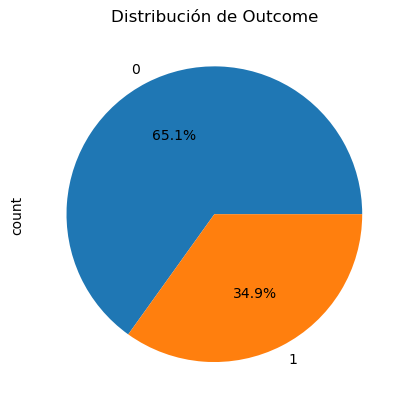

In [23]:
# Gráfico de pie para la variable 'Outcome'
df['Outcome'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribución de Outcome')
plt.show()


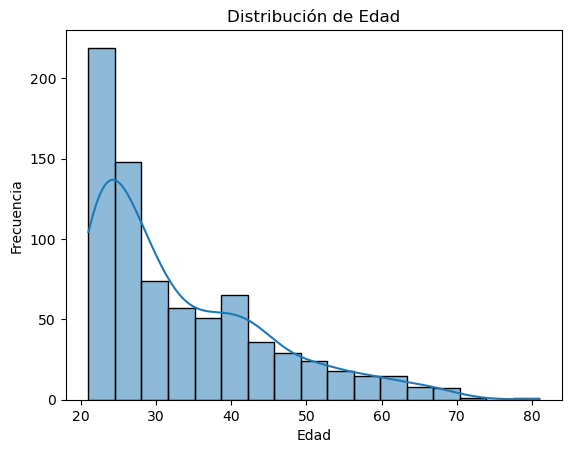

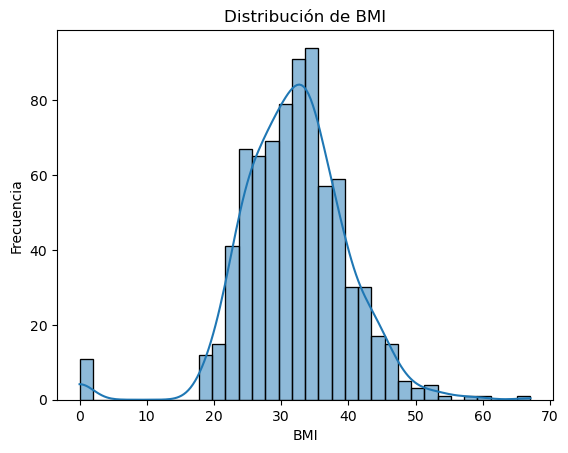

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograma de la variable 'Age'
sns.histplot(df['Age'], kde=True)
plt.title('Distribución de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# Histograma de la variable 'BMI'
sns.histplot(df['BMI'], kde=True)
plt.title('Distribución de BMI')
plt.xlabel('BMI')
plt.ylabel('Frecuencia')
plt.show()


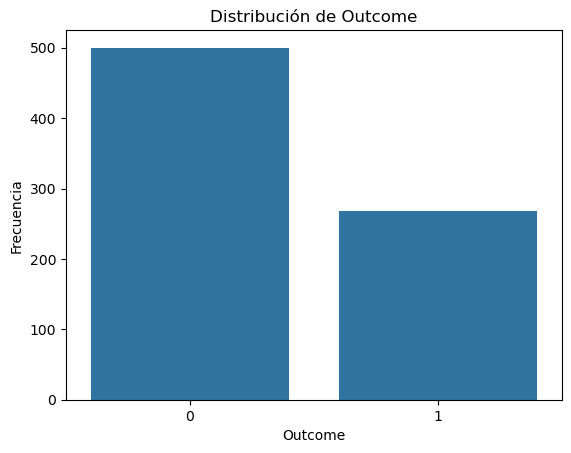

In [25]:
# Gráfico de barras de la variable 'Outcome'
sns.countplot(x='Outcome', data=df)
plt.title('Distribución de Outcome')
plt.xlabel('Outcome')
plt.ylabel('Frecuencia')
plt.show()


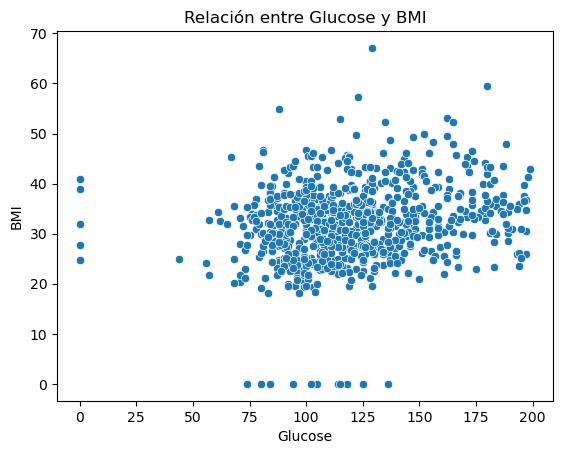

In [26]:
# Diagrama de dispersión entre 'Glucose' y 'BMI'
sns.scatterplot(x='Glucose', y='BMI', data=df)
plt.title('Relación entre Glucose y BMI')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.show()




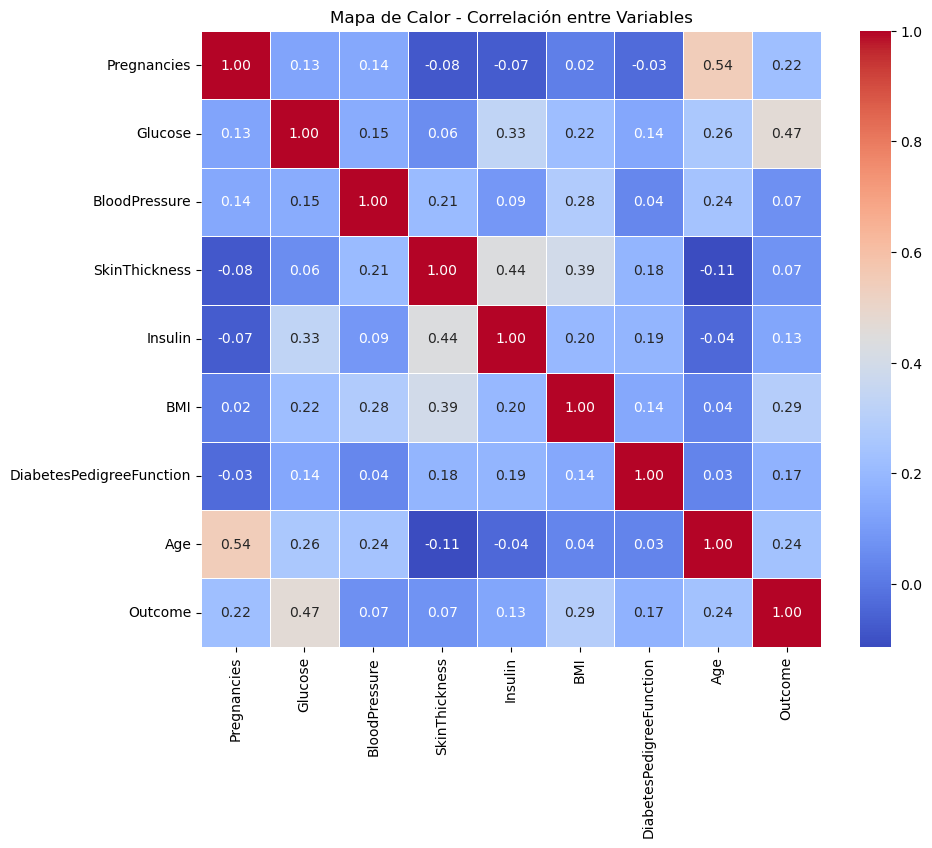

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcula la matriz de correlación
correlation_matrix = df.corr()

# Mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de Calor - Correlación entre Variables')
plt.show()


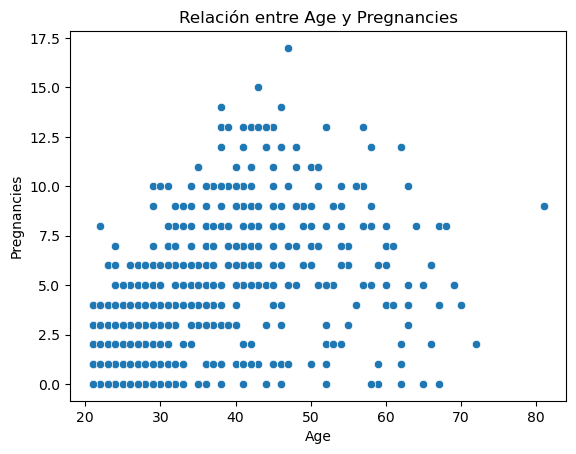

In [28]:
# Diagrama de dispersión entre 'Age' y 'Pregnancies'
sns.scatterplot(x='Age', y='Pregnancies', data=df)
plt.title('Relación entre Age y Pregnancies')
plt.xlabel('Age')
plt.ylabel('Pregnancies')
plt.show()

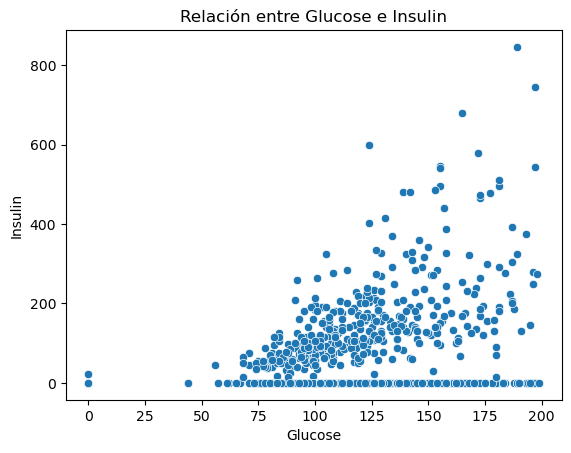

In [29]:
# Supongamos que 'Glucose' y 'Insulin' tienen una correlación alta
sns.scatterplot(x='Glucose', y='Insulin', data=df)
plt.title('Relación entre Glucose e Insulin')
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.show()


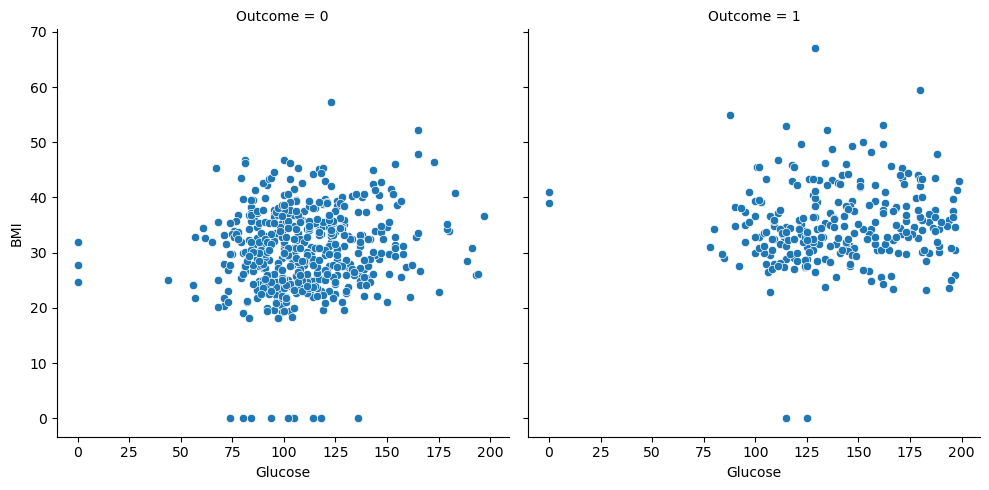

In [30]:
# Gráfico de dispersión entre 'Glucose' y 'BMI', dividido por 'Outcome'
g = sns.FacetGrid(df, col="Outcome", height=5)
g.map(sns.scatterplot, "Glucose", "BMI")
g.set_axis_labels('Glucose', 'BMI')
plt.show()




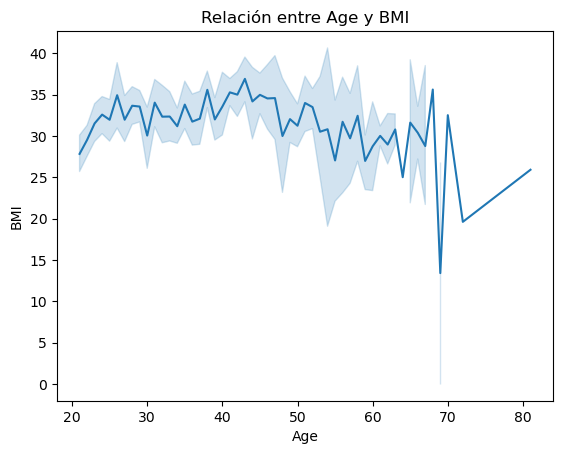

In [31]:
# Ejemplo de gráfico de líneas entre dos variables
sns.lineplot(x='Age', y='BMI', data=df)
plt.title('Relación entre Age y BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()


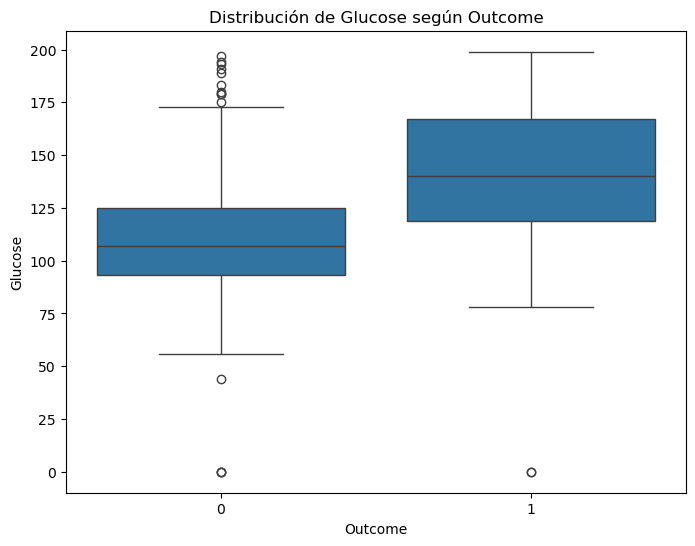

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot de 'Glucose' según 'Outcome'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='Glucose', data=df)
plt.title('Distribución de Glucose según Outcome')
plt.xlabel('Outcome')
plt.ylabel('Glucose')
plt.show()


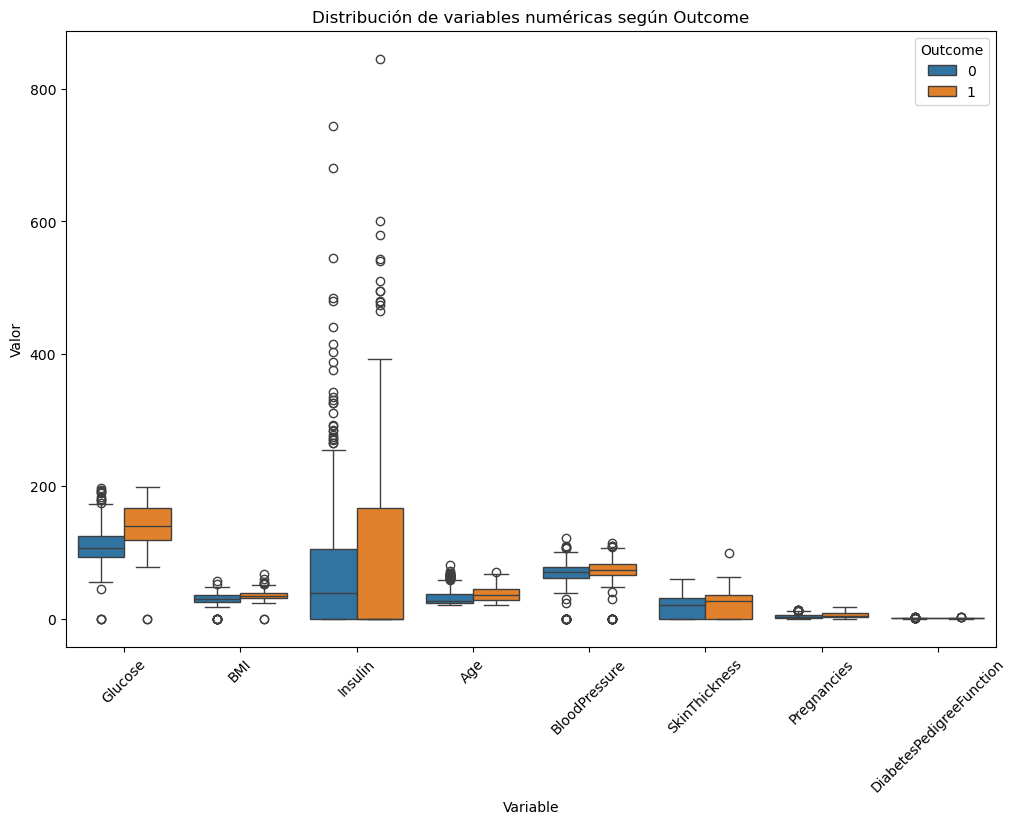

In [33]:
# Gráfico de cajas para múltiples variables
numerical_columns = ['Glucose', 'BMI', 'Insulin', 'Age', 'BloodPressure', 'SkinThickness', 'Pregnancies', 'DiabetesPedigreeFunction']
df_melted = df[numerical_columns + ['Outcome']].melt(id_vars='Outcome', value_vars=numerical_columns)

plt.figure(figsize=(12, 8))
sns.boxplot(x='variable', y='value', hue='Outcome', data=df_melted)
plt.title('Distribución de variables numéricas según Outcome')
plt.xlabel('Variable')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.show()


**Estadísticas descriptivas:**

In [34]:
import pandas as pd

# Asegúrate de que no haya espacios extra en los nombres de las columnas
df.columns = df.columns.str.strip()

# Verifica que 'Outcome' sea de tipo categórico
df['Outcome'] = df['Outcome'].astype('category')

# Filtra solo las columnas numéricas
numerical_columns = df.select_dtypes(include=['number']).columns

# Crea un DataFrame para las estadísticas
estadisticas = pd.DataFrame()

# Medidas de tendencia central solo para las columnas numéricas
estadisticas['Media'] = df[numerical_columns].mean()
estadisticas['Mediana'] = df[numerical_columns].median()
estadisticas['Moda'] = df[numerical_columns].mode().iloc[0]  # La moda puede tener varios valores, tomamos el primero

# Imprimir el DataFrame con las estadísticas
print(estadisticas)



                               Media   Mediana    Moda
Pregnancies                 3.845052    3.0000   1.000
Glucose                   120.894531  117.0000  99.000
BloodPressure              69.105469   72.0000  70.000
SkinThickness              20.536458   23.0000   0.000
Insulin                    79.799479   30.5000   0.000
BMI                        31.992578   32.0000  32.000
DiabetesPedigreeFunction    0.471876    0.3725   0.254
Age                        33.240885   29.0000  22.000


In [35]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


## **Implementación de Modelos:**

**RandomForestClassifier**

RandomForest Accuracy: 0.72
RandomForest Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



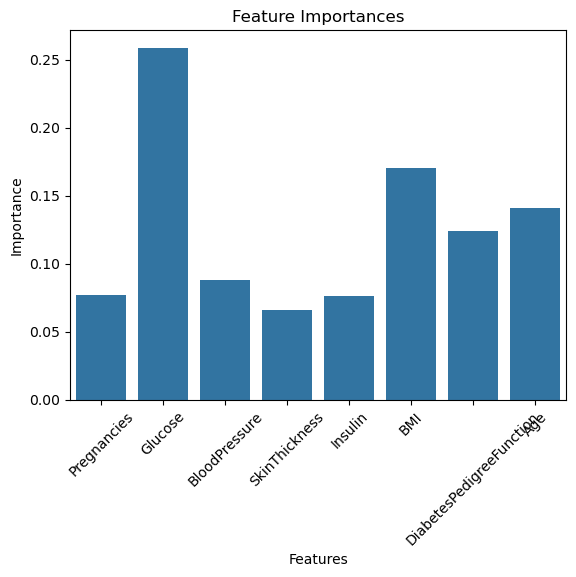

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocesar: Separar variables dependientes e independientes
X = df.drop('Outcome', axis=1)  # Variables independientes
y = df['Outcome']  # Variable dependiente

# Dividir el dataset en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo Random Forest
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
model_rf.fit(X_train, y_train)

# Hacer predicciones sobre el conjunto de prueba
y_pred_rf = model_rf.predict(X_test)
y_proba_rf = model_rf.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva para calcular ROC-AUC

# Evaluar el rendimiento del modelo
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'RandomForest Accuracy: {accuracy_rf:.2f}')

# Imprimir el reporte de clasificación
print("RandomForest Classification Report:\n", classification_report(y_test, y_pred_rf))

# Visualizar la importancia de las características
feature_importances = model_rf.feature_importances_
sns.barplot(x=X.columns, y=feature_importances)
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()

RandomForest - Confusion Matrix:
 [[77 22]
 [21 34]]


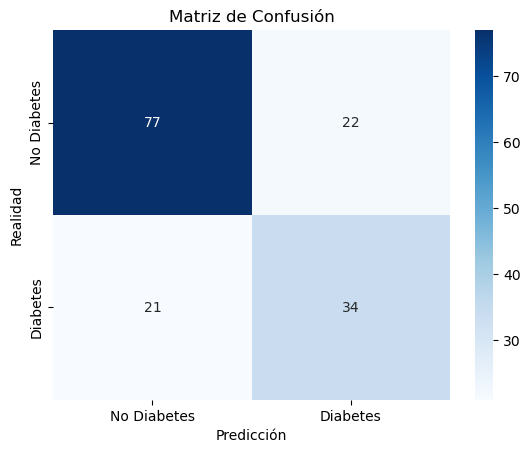

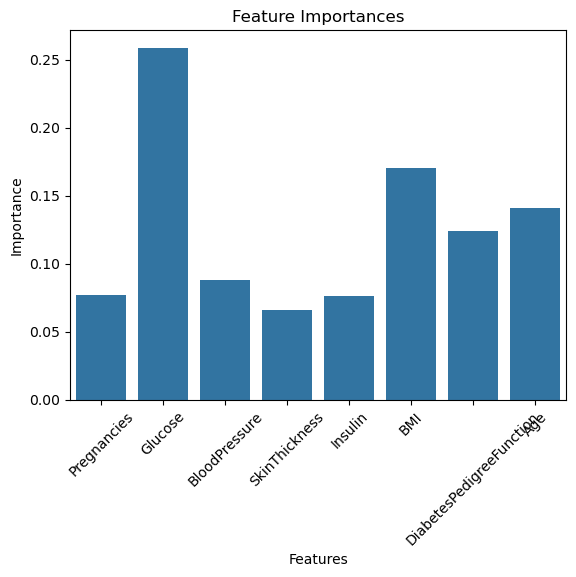

In [50]:
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("RandomForest - Confusion Matrix:\n", conf_matrix_rf)

# Visualizar la matriz de confusión
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

# Visualizar la importancia de las características
feature_importances = model_rf.feature_importances_
sns.barplot(x=X.columns, y=feature_importances)
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()

**XGBClassifier**

In [51]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

 
# Dividimos el dataset en características (X) y variable objetivo (y)
#X = df.drop('Outcome', axis=1)  # "Outcome" es la variable objetivo
#y = df['Outcome']

# Dividir el dataset en entrenamiento y prueba (80% para entrenamiento, 20% para prueba)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo XGBoost
model_xgb = xgb.XGBClassifier(
    objective='binary:logistic',   # Objetivo binario
    eval_metric='logloss',         # Métrica de evaluación
#    use_label_encoder=False,       # Evitar la advertencia de uso de LabelEncoder
    random_state=42                # Para reproducibilidad
    ,
    enable_categorical=True  # Habilitar tratamiento de variables categóricas
)

# Entrenar el modelo
model_xgb.fit(X_train, y_train)

# Realizar predicciones
y_pred_xgb = model_xgb.predict(X_test)

# Evaluar el modelo
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'XGBClassifier Accuracy: {accuracy_xgb:.4f}')

# Matriz de confusión
print('XGBClassifier Matriz de Confusión:')
print(confusion_matrix(y_test, y_pred_xgb))

# Reporte de clasificación
print('Reporte de Clasificación:')
print(classification_report(y_test, y_pred_xgb))

XGBClassifier Accuracy: 0.7078
XGBClassifier Matriz de Confusión:
[[73 26]
 [19 36]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.79      0.74      0.76        99
           1       0.58      0.65      0.62        55

    accuracy                           0.71       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.72      0.71      0.71       154



**Evaluación de Modelos:** Evalúa los modelos utilizando métricas como accuracy, precision, recall, F1-score, y ROC-AUC.

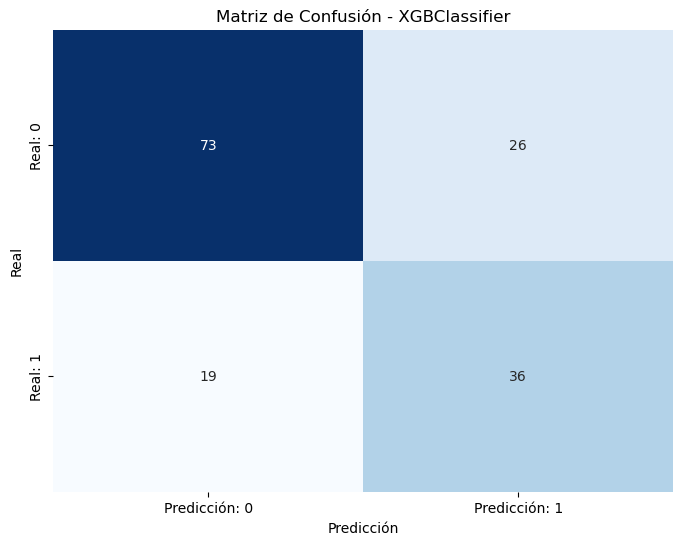

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# Crear un gráfico de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicción: 0', 'Predicción: 1'], 
            yticklabels=['Real: 0', 'Real: 1'])

# Etiquetas y título
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - XGBClassifier')

# Mostrar el gráfico
plt.show()


Accuracy: 0.7078
Precision: 0.5806
Recall: 0.6545
F1-Score: 0.6154
ROC-AUC: 0.7666
Matriz de Confusión:
[[73 26]
 [19 36]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.79      0.74      0.76        99
           1       0.58      0.65      0.62        55

    accuracy                           0.71       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.72      0.71      0.71       154



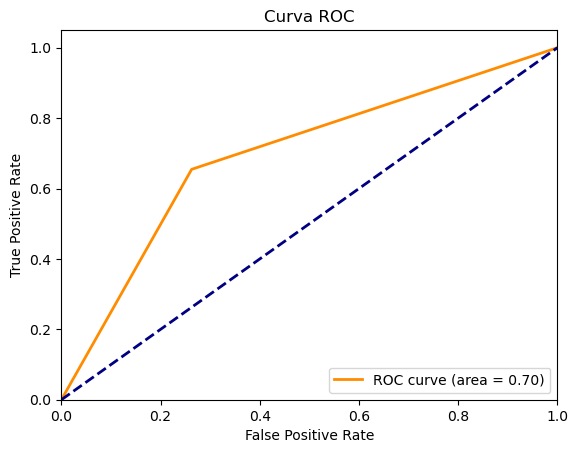

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_proba_xgb = model_xgb.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva para calcular ROC-AUC

# 1. Accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'Accuracy: {accuracy_xgb:.4f}')

# 2. Precision
precision_xgb = precision_score(y_test, y_pred_xgb)
print(f'Precision: {precision_xgb:.4f}')

# 3. Recall
recall_xgb = recall_score(y_test, y_pred_xgb)
print(f'Recall: {recall_xgb:.4f}')

# 4. F1-Score
f1_xgb = f1_score(y_test, y_pred_xgb)
print(f'F1-Score: {f1_xgb:.4f}')

# 5. ROC-AUC
roc_auc_xgb = roc_auc_score(y_test, y_proba_xgb)
print(f'ROC-AUC: {roc_auc_xgb:.4f}')

# Matriz de Confusión
print('Matriz de Confusión:')
print(confusion_matrix(y_test, y_pred_xgb))

# Reporte de Clasificación
print('Reporte de Clasificación:')
print(classification_report(y_test, y_pred_xgb))

# Graficar la curva ROC
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_pred_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure()
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()


**Matriz de Confusión:**

**Verdaderos Negativos (TN):** 73 (predijo correctamente la clase 0).

**Falsos Positivos (FP):** 26 (predijo incorrectamente la clase 1).

**Falsos Negativos (FN):** 19 (predijo incorrectamente la clase 0).

**Verdaderos Positivos (TP):** 36 (predijo correctamente la clase 1).

**Reporte de Clasificación:**
El reporte de clasificación proporciona una visión más detallada de las métricas para cada clase:

Para la clase 0 (por ejemplo, personas no enfermas):

**Precision:** 0.79, lo que significa que de todas las predicciones que el modelo hizo como clase 0, el 79% fueron correctas.

**Recall:** 0.74, lo que significa que el modelo detectó el 74% de todos los casos verdaderos de la clase 0.

**F1-Score:** 0.76, que es una combinación equilibrada de precision y recall para la clase 0.

Para la clase 1 (por ejemplo, personas enfermas):

**Precision:** 0.58, lo que significa que el 58% de las predicciones para la clase 1 fueron correctas.

**Recall:** 0.65, lo que significa que el modelo detectó el 65% de los casos verdaderos de la clase 1.

**F1-Score:** 0.62, que es un equilibrio entre precision y recall para la clase 1.

## **SMOTE**

In [57]:
# Importar las librerías necesarias
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Cargar el dataset (asegúrate de que 'Outcome' sea la variable objetivo)
import pandas as pd

# Suponiendo que ya tienes el DataFrame 'df'
X = df.drop(columns=['Outcome'])  # Variables independientes
y = df['Outcome']                # Variable objetivo

# Dividir los datos en entrenamiento y prueba
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Aplicar SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Verificar el balance de las clases después de SMOTE
print("Distribución antes de SMOTE:", y_train.value_counts())
print("Distribución después de SMOTE:", pd.Series(y_train_smote).value_counts())

# Entrenar un modelo (Random Forest en este caso)
model = RandomForestClassifier(random_state=42)
model.fit(X_train_smote, y_train_smote)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
print("RandomForestClassifier - Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nRandomForestClassifier - Reporte de Clasificación:")
print(classification_report(y_test, y_pred))


Distribución antes de SMOTE: Outcome
0    401
1    213
Name: count, dtype: int64
Distribución después de SMOTE: Outcome
0    401
1    401
Name: count, dtype: int64
RandomForestClassifier - Matriz de Confusión:
[[74 25]
 [14 41]]

RandomForestClassifier - Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.84      0.75      0.79        99
           1       0.62      0.75      0.68        55

    accuracy                           0.75       154
   macro avg       0.73      0.75      0.73       154
weighted avg       0.76      0.75      0.75       154



C:\Users\user\AppData\Local\Temp\ipykernel_16052\1301289151.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=results.T, ci=None)


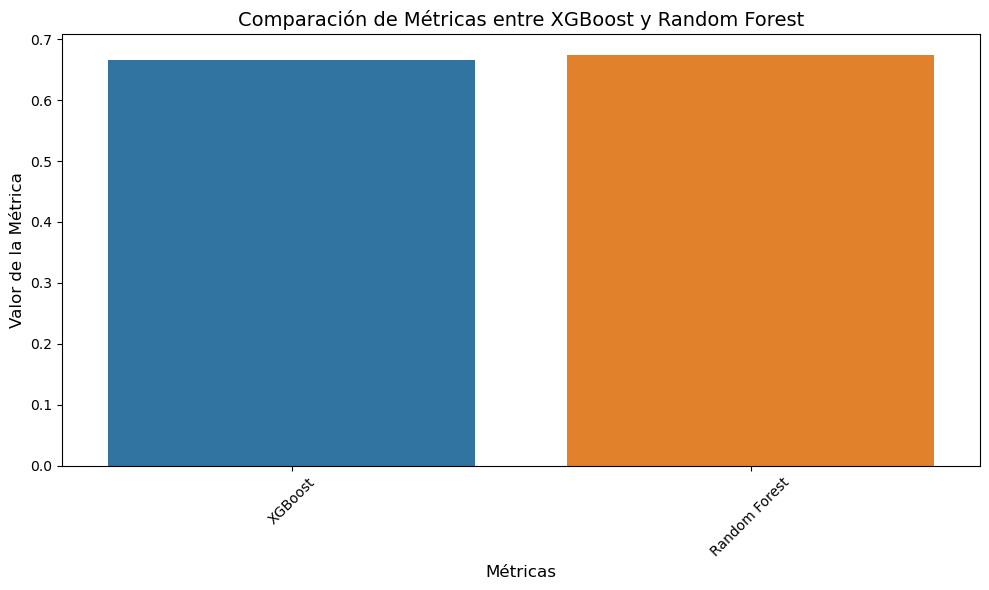

Mejor modelo basado en las métricas:
Accuracy     Random Forest
Precision    Random Forest
Recall             XGBoost
F1-Score           XGBoost
ROC-AUC      Random Forest
dtype: object


In [73]:
##Comparar en un DataFrame
results = pd.DataFrame([xgboost_metrics, rf_metrics], index=["XGBoost", "Random Forest"])

# Gráfico de barras comparando las métricas
plt.figure(figsize=(10, 6))
sns.barplot(data=results.T, ci=None)
plt.title("Comparación de Métricas entre XGBoost y Random Forest", fontsize=14)
plt.ylabel("Valor de la Métrica", fontsize=12)
plt.xlabel("Métricas", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Identificar el modelo con mejor rendimiento
print("Mejor modelo basado en las métricas:")
print(results.idxmax(axis=0))

**Random Forest** se destaca en términos de accuracy, precision y ROC-AUC, lo que lo hace adecuado para problemas donde una mayor proporción de predicciones correctas y evitar falsos positivos son cruciales.

**XGBoost** es fuerte en recall y F1-Score, lo que lo convierte en una excelente opción cuando es más importante detectar todos los casos positivos posibles, incluso si eso significa aceptar algunos falsos positivos.

LGBM

[LightGBM] [Info] Number of positive: 213, number of negative: 401
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000282 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 664
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.346906 -> initscore=-0.632669
[LightGBM] [Info] Start training from score -0.632669
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

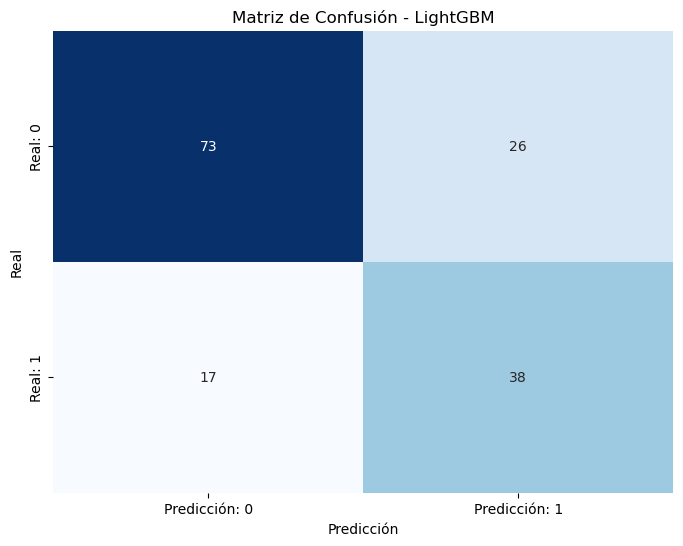

In [80]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Crear el modelo LightGBM
model_lgb = lgb.LGBMClassifier(random_state=42)

# Entrenar el modelo
model_lgb.fit(X_train, y_train)

# Realizar predicciones
y_pred_lgb = model_lgb.predict(X_test)
y_proba_lgb = model_lgb.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva para calcular ROC-AUC

# Evaluar el modelo
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
print(f'LightGBM Accuracy: {accuracy_lgb:.4f}')

# Matriz de confusión
print('LightGBM Matriz de Confusión:')
print(confusion_matrix(y_test, y_pred_lgb))

# Reporte de clasificación
print('Reporte de Clasificación:')
print(classification_report(y_test, y_pred_lgb))

# Graficar la matriz de confusión
conf_matrix_lgb = confusion_matrix(y_test, y_pred_lgb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lgb, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicción: 0', 'Predicción: 1'], 
            yticklabels=['Real: 0', 'Real: 1'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - LightGBM')
plt.show()


**AdaBoost**

c:\Users\user\.conda\envs\bootcamp_mitic\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy: 0.7338
AdaBoost Matriz de Confusión:
[[78 21]
 [20 35]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.80      0.79      0.79        99
           1       0.62      0.64      0.63        55

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154



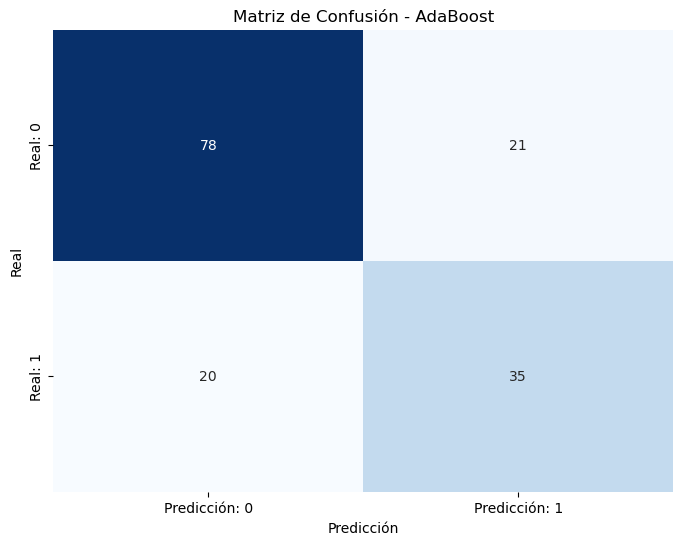

In [81]:
from sklearn.ensemble import AdaBoostClassifier

# Crear el modelo AdaBoost
model_ab = AdaBoostClassifier(random_state=42)

# Entrenar el modelo
model_ab.fit(X_train, y_train)

# Realizar predicciones
y_pred_ab = model_ab.predict(X_test)
y_proba_ab = model_ab.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva para calcular ROC-AUC

# Evaluar el modelo
accuracy_ab = accuracy_score(y_test, y_pred_ab)
print(f'AdaBoost Accuracy: {accuracy_ab:.4f}')

# Matriz de confusión
print('AdaBoost Matriz de Confusión:')
print(confusion_matrix(y_test, y_pred_ab))

# Reporte de clasificación
print('Reporte de Clasificación:')
print(classification_report(y_test, y_pred_ab))

# Graficar la matriz de confusión
conf_matrix_ab = confusion_matrix(y_test, y_pred_ab)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ab, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicción: 0', 'Predicción: 1'], 
            yticklabels=['Real: 0', 'Real: 1'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - AdaBoost')
plt.show()


**GradientBoosting**

Gradient Boosting Accuracy: 0.7468
Gradient Boosting Matriz de Confusión:
[[78 21]
 [18 37]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



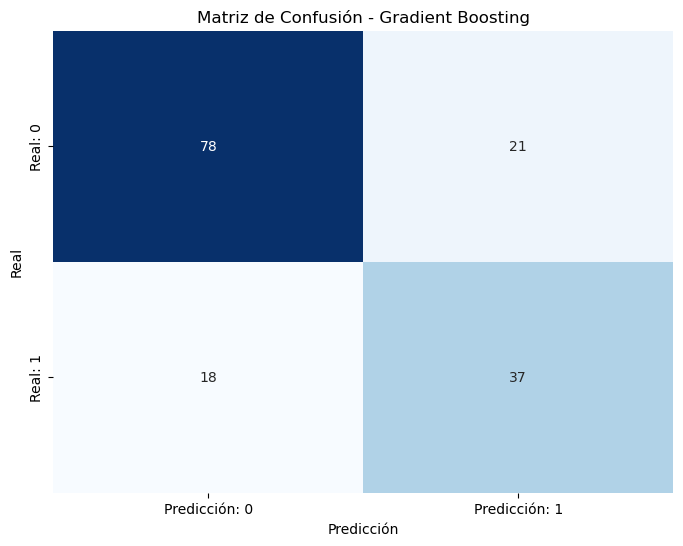

In [83]:
from sklearn.ensemble import GradientBoostingClassifier

# Crear el modelo Gradient Boosting
model_gb = GradientBoostingClassifier(random_state=42)

# Entrenar el modelo
model_gb.fit(X_train, y_train)

# Realizar predicciones
y_pred_gb = model_gb.predict(X_test)
y_proba_gb = model_gb.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva para calcular ROC-AUC

# Evaluar el modelo
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f'Gradient Boosting Accuracy: {accuracy_gb:.4f}')

# Matriz de confusión
print('Gradient Boosting Matriz de Confusión:')
print(confusion_matrix(y_test, y_pred_gb))

# Reporte de clasificación
print('Reporte de Clasificación:')
print(classification_report(y_test, y_pred_gb))

# Graficar la matriz de confusión
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicción: 0', 'Predicción: 1'], 
            yticklabels=['Real: 0', 'Real: 1'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Gradient Boosting')
plt.show()


In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Función para evaluar un modelo y calcular métricas
def evaluate_model(y_test, y_pred_, y_proba_):
    metrics = {
        "Accuracy": accuracy_score(y_test, y_pred_),
        "Precision": precision_score(y_test, y_pred_),
        "Recall": recall_score(y_test, y_pred_),
        "F1-Score": f1_score(y_test, y_pred_),
        "ROC-AUC": roc_auc_score(y_test, y_proba_),
    }
    return metrics

print("---")
# Resultados del modelo 1 (por ejemplo, XGBoost)
xgboost_metrics = evaluate_model(y_test, y_pred_xgb, y_proba_xgb)

# Resultados del modelo 2 (por ejemplo, Random Forest)
rf_metrics = evaluate_model(y_test, y_pred_rf, y_proba_rf)

lgb_metrics = evaluate_model(y_test, y_pred_lgb, y_proba_lgb)
 
ab_metrics = evaluate_model(y_test, y_pred_ab, y_proba_ab)

gb_metrics = evaluate_model(y_test, y_pred_gb, y_proba_gb)

# Comparar en un DataFrame
results = pd.DataFrame([xgboost_metrics, rf_metrics, lgb_metrics, ab_metrics, gb_metrics], index=["XGBoost", "Random Forest", "LGBM","Adaboost","Gradient Boosting"])
print(results)

print("---")

# Identificar el modelo con mejor rendimiento
print("Mejor modelo basado en las métricas:")
print(results.idxmax(axis=0))

print("---")

---
                   Accuracy  Precision    Recall  F1-Score   ROC-AUC
XGBoost            0.707792   0.580645  0.654545  0.615385  0.766575
Random Forest      0.720779   0.607143  0.618182  0.612613  0.812029
LGBM               0.720779   0.593750  0.690909  0.638655  0.767860
Adaboost           0.733766   0.625000  0.636364  0.630631  0.786226
Gradient Boosting  0.746753   0.637931  0.672727  0.654867  0.809734
---
Mejor modelo basado en las métricas:
Accuracy     Gradient Boosting
Precision    Gradient Boosting
Recall                    LGBM
F1-Score     Gradient Boosting
ROC-AUC          Random Forest
dtype: object
---


>**Observación**
Al observar se puede evidenciar que:
> -  `Gradient Boosting` es mejor en Accuracy, Precision y F1-Score.

> - `LGBM` es mejor en Recall. 

> - `Random Forest` es mejor en ROC-AUC.

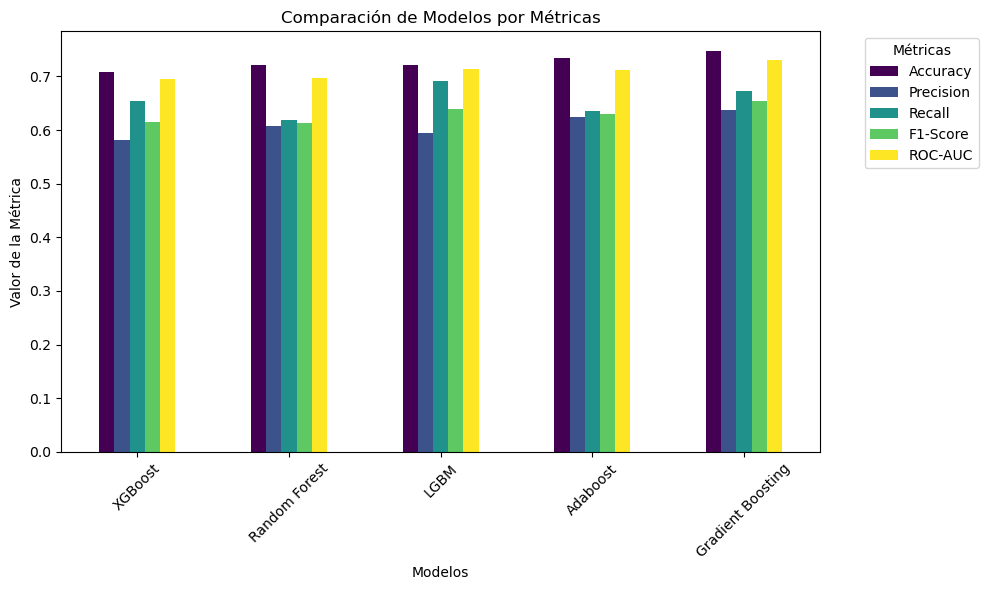

In [91]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Aquí asumimos que tienes tus modelos ya entrenados y las predicciones generadas.
# Los valores de y_pred_xgb, y_pred_rf, y_pred_lgbm, y_pred_ada, y_pred_gb son las predicciones de cada modelo.

# Reemplaza 'y_pred_xgb', 'y_pred_rf', 'y_pred_lgbm', etc. con las predicciones reales de tus modelos
y_preds = {
    'XGBoost': y_pred_xgb,
    'Random Forest': y_pred_rf,
    'LGBM': y_pred_lgb,
    'Adaboost': y_pred_ab,
    'Gradient Boosting': y_pred_gb
}

# Inicializa un diccionario para almacenar las métricas de cada modelo
metrics = {
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': [],
    'ROC-AUC': []
}

# Calculamos las métricas para cada modelo
for model_name, y_pred in y_preds.items():
    metrics['Accuracy'].append(accuracy_score(y_test, y_pred))
    metrics['Precision'].append(precision_score(y_test, y_pred))
    metrics['Recall'].append(recall_score(y_test, y_pred))
    metrics['F1-Score'].append(f1_score(y_test, y_pred))
    metrics['ROC-AUC'].append(roc_auc_score(y_test, y_pred))

# Convertir el diccionario a un DataFrame para facilitar el manejo de los datos
import pandas as pd
metrics_df = pd.DataFrame(metrics, index=y_preds.keys())

# Graficar los resultados
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar las métricas como barras
metrics_df.plot(kind='bar', ax=ax, colormap='viridis')

# Configuración del gráfico
ax.set_title('Comparación de Modelos por Métricas')
ax.set_ylabel('Valor de la Métrica')
ax.set_xlabel('Modelos')
ax.set_xticklabels(metrics_df.index, rotation=45)
ax.legend(title="Métricas", bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


>**Observación**

> -  Un grafico para mostrar el resultado de la comparacion.